In [1]:
import os
import json

import glob as gb
import utils as ut
import numpy as np
import pandas as pd
import seaborn as sns

import ipywidgets as pyw
import matplotlib.pyplot as plt

# Global

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['text.usetex'] = True
plt.style.use(['dark_background'])

# Data

In [4]:
# load data
data = ut.load_data(os.path.join('data', 'v6', 'forest-05', '*.zip'))

extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-14-10
extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-14-20
extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-14-35
extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-14-45
extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-14-55
extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-15-16
extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-15-27
extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-18-43
extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-22-12
extract /tmp/tmp_4slvl2n/AOS-Simulation-2021-04-30-23-47


In [5]:
# simulation
index = 0
simulation = list(data.keys())[index]

print('simulations:\n', '\n '.join([f'{i}: ' + (f'{x} [x]' if x == simulation else x) for i, x in enumerate(list(data.keys()))]))

simulations:
 0: AOS-Simulation-2021-04-30-14-10 [x]
 1: AOS-Simulation-2021-04-30-14-20
 2: AOS-Simulation-2021-04-30-14-35
 3: AOS-Simulation-2021-04-30-14-45
 4: AOS-Simulation-2021-04-30-14-55
 5: AOS-Simulation-2021-04-30-15-16
 6: AOS-Simulation-2021-04-30-15-27
 7: AOS-Simulation-2021-04-30-18-43
 8: AOS-Simulation-2021-04-30-22-12
 9: AOS-Simulation-2021-04-30-23-47


In [6]:
# load images
df = data[simulation]['images']
df = df[df['type'] == 'monochrome']
df = df.reset_index(drop=True)

print('images:', df.shape[0])

images: 282


In [8]:
# load parameters
parameters = data[simulation]['parameters']
parameters['images'] = df.shape[0]

print('\nparameters:', json.dumps(parameters, indent=4))


parameters: {
    "speed": 4,
    "height": 35,
    "coverage": 69.99999999999999,
    "view": 90,
    "images": 282,
    "sampling": 1,
    "resolution": 512,
    "type": "monochrome",
    "preset": "forest-05",
    "size": 1500,
    "ground": 70,
    "color": 16777215
}


# Plots

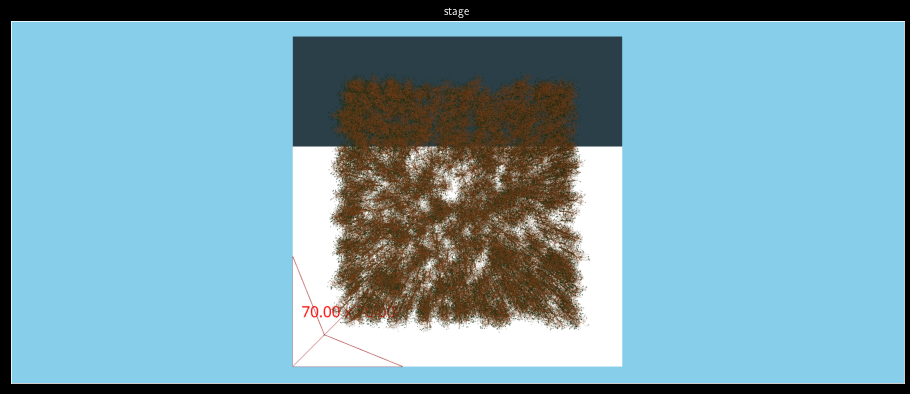

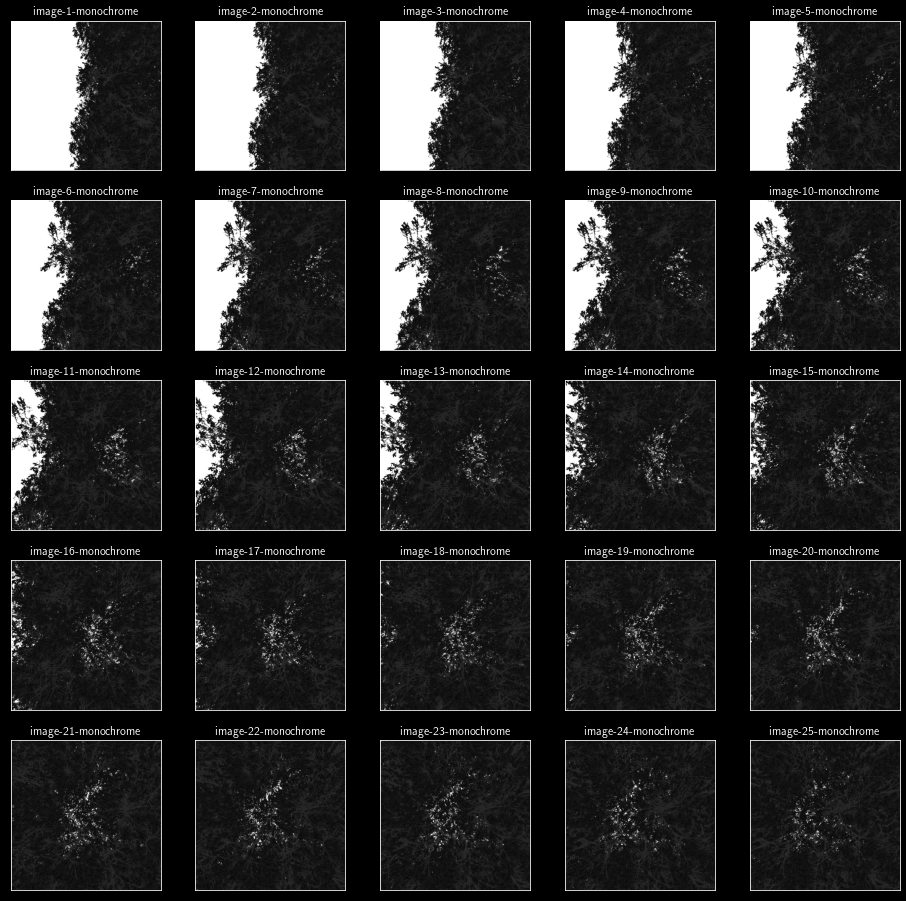

In [9]:
fig, ax = plt.subplots(figsize=(16, 16))

# plot stage image
ut.plot_image(ax, data[simulation]['stage'], 'stage')

# plot sample images
ut.plot_images(df['data'], df['name'])

In [10]:
df_integrate = df[:18]

# integrate images
integrated = ut.integrate_image(df_integrate, parameters, N=30)

# grayscale images
grayscaled = np.array([ut.grayscale_image(x) for x in df_integrate['data']])

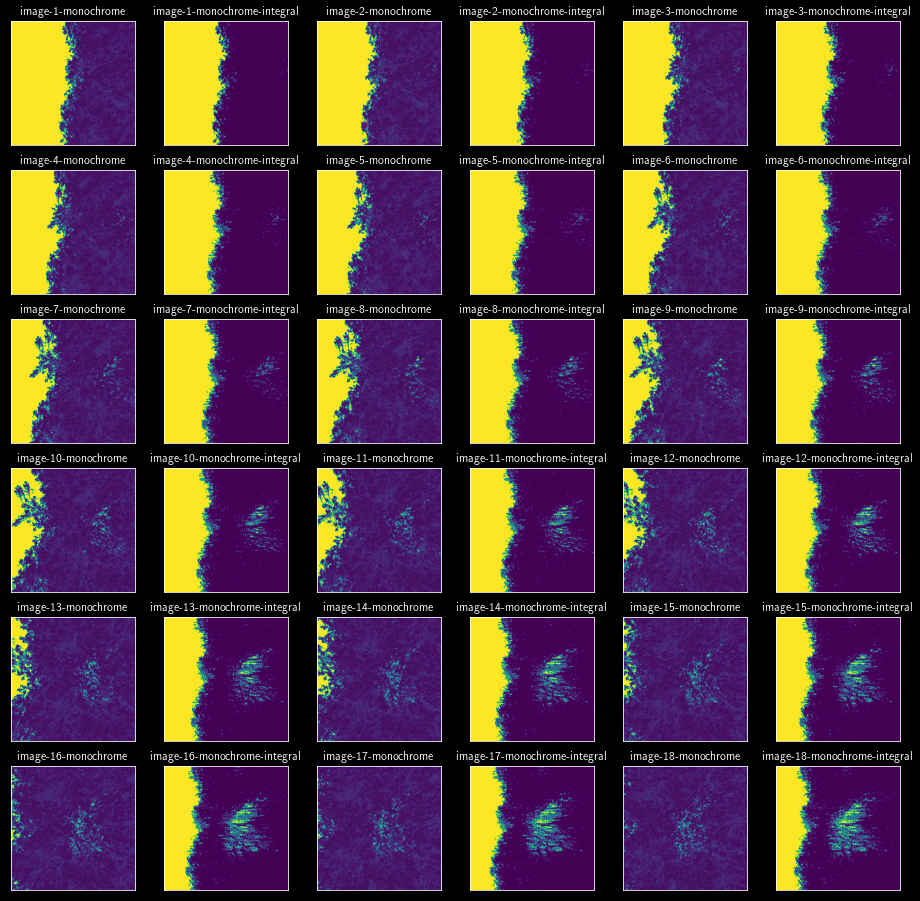

In [11]:
image_vs_integrated = np.hstack([grayscaled, integrated]).reshape(integrated.shape * np.array([2, 1, 1]))
image_vs_integrated_labels = np.dstack([df_integrate['name'], df_integrate['name'] + '-integral']).flatten()

# plot integrated images
ut.plot_images(image_vs_integrated, image_vs_integrated_labels, rows=6, cols=6)

In [12]:
# integrate ground
ground, alphas = ut.integrate_ground(df, parameters)

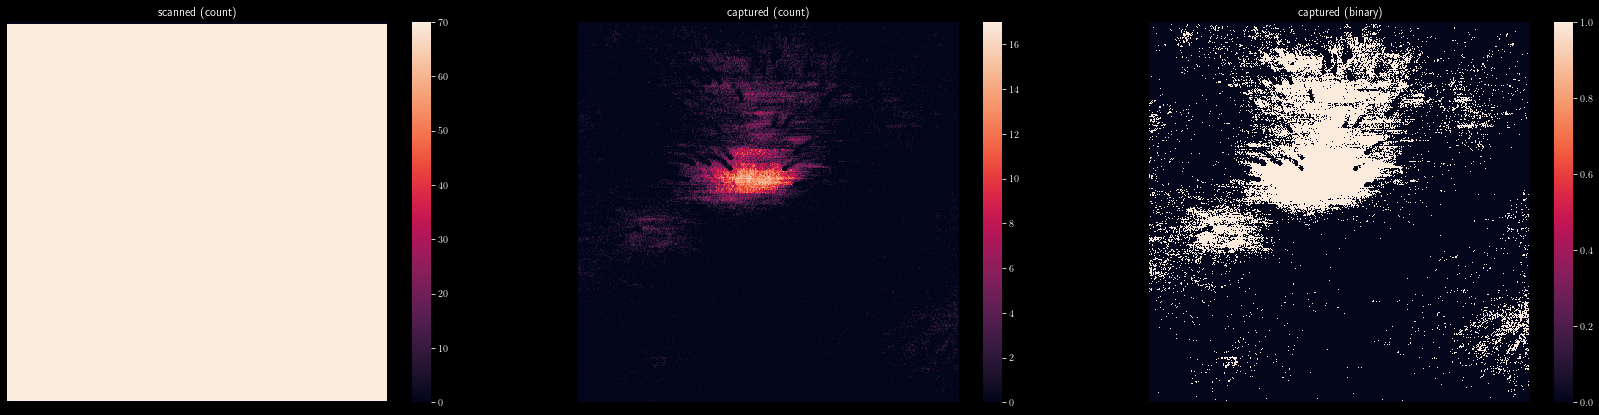

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(29, 7))

# plot ground images
ut.plot_heatmap(axs[0], ground[:, :, 0], 'scanned (count)')
ut.plot_heatmap(axs[1], ground[:, :, 1], 'captured (count)')
ut.plot_heatmap(axs[2], ut.normalize_image(ground[:, :, 1] > 0), 'captured (binary)')

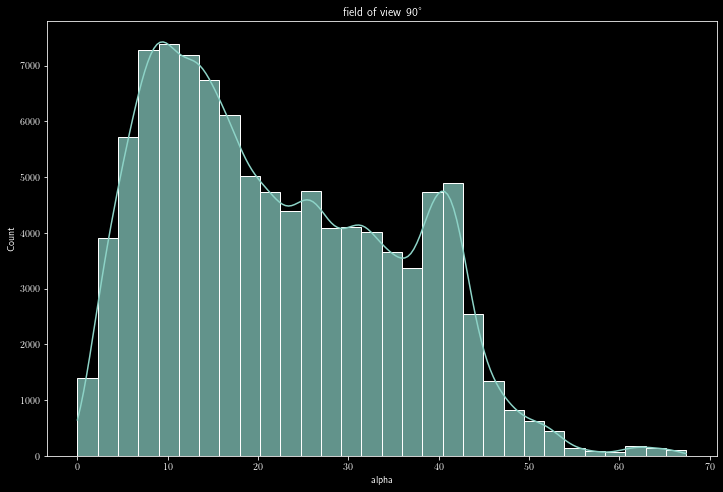

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

# alpha dataframe
df_alpha = pd.DataFrame(alphas.T, columns=['x', 'y', 'alpha'])
df_alpha = df_alpha.sample(n=np.minimum(df_alpha.shape[0], 10**5), random_state=42)

# plot alpha distribution (sampled)
ut.plot_histogram(ax, df_alpha, 'alpha', f'field of view {parameters["view"]}°')

In [15]:
scanned = np.count_nonzero(ground[:, :, 0])
captured = np.count_nonzero(ground[:, :, 1])
density = 1 - captured / scanned
mean = 1 - (ground[:, :, 1] > 0).mean()

print('density:', density)
print('mean:', mean)

density: 0.8304132293245038
mean: 0.8323668639053254
